**Before you dive into the implementations, I highly recommend first learning the heart of each algorithm—its core idea and how it works. You can explore this through YouTube tutorials, books, or online courses. This repository is meant to complement that knowledge by showing how to translate concepts into working code.**

# t-SNE: t-distributed Stochastic Neighbor Embedding

t-SNE is a powerful non-linear dimensionality reduction technique primarily used for visualizing high-dimensional data in lower dimensions (typically 2D or 3D). It's particularly effective at revealing local structures and clusters within the data.

## The Process:

1.  **Pairwise Similarities in High-Dimensional Space:**

    *   t-SNE begins by calculating the pairwise similarities between all data points in the original high-dimensional space.
    *   It uses a Gaussian distribution centered on each data point to compute these similarities. The similarity between points *i* and *j* is given by:

        $$p_{j|i} = \frac{\exp(-||x_i - x_j||^2 / 2\sigma_i^2)}{\sum_{k \neq i} \exp(-||x_i - x_k||^2 / 2\sigma_i^2)}$$

        where:

        *   $$x_i$$ and $$x_j$$ are the data points.
        *   $$\sigma_i$$ is the variance of the Gaussian distribution centered on $$x_i$$, determined based on the perplexity parameter.

    *   To ensure symmetry, the joint probability is calculated as:

        $$p_{ij} = \frac{p_{j|i} + p_{i|j}}{2n}$$

        where *n* is the number of data points.

2.  **Pairwise Similarities in Low-Dimensional Space:**

    *   t-SNE then maps the high-dimensional data points to lower-dimensional points.
    *   It uses a Student's t-distribution with one degree of freedom to measure similarities in this low-dimensional space. The similarity between points *i* and *j* in the low-dimensional space is given by:

        $$q_{ij} = \frac{(1 + ||y_i - y_j||^2)^{-1}}{\sum_{k \neq l} (1 + ||y_k - y_l||^2)^{-1}}$$

        where $$y_i$$ and $$y_j$$ are the low-dimensional representations of the data points.

3.  **Minimizing the KL Divergence:**

    *   The core of t-SNE is to minimize the Kullback-Leibler (KL) divergence between the high-dimensional probabilities (*P*) and the low-dimensional probabilities (*Q*). The KL divergence is defined as:

        $$KL(P||Q) = \sum_i \sum_j p_{ij} \log \frac{p_{ij}}{q_{ij}}$$

    *   This minimization is performed using gradient descent. The gradient of the KL divergence with respect to the low-dimensional embedding $$y_i$$ is:

  $$\frac{\partial KL}{\partial y_i} = 4 \sum_j (p_{ij} - q_{ij})(y_i - y_j)(1 + ||y_i - y_j||^2)^{-1}$$

    *   By minimizing this divergence, t-SNE attempts to preserve the local neighborhood structures from the high-dimensional space in the low-dimensional embedding.

## Key Parameters:

*   **Perplexity:** Controls the local neighborhood size. Typical values are between 5 and 50.
*   **Number of Iterations:** The number of optimization steps.

## Important Notes:

*   t-SNE is computationally intensive, especially for large datasets.
*   The results can be sensitive to the choice of perplexity.
*   t-SNE is primarily for visualization; distances between clusters in the low-dimensional space may not be directly interpretable. It focuses on local structures, not global ones.

In [ ]:
# Install necessary libraries
!pip install numpy scikit-learn matplotlib seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits  # Using the digits dataset for demonstration


In [4]:

# Load the digits dataset (handwritten digits 0-9)
digits = load_digits()
X = digits.data  # Feature data (64 dimensions: 8x8 pixel images)
y = digits.target  # Target labels (0-9)
df=pd.DataFrame(X,y)
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
0,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
8,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
9,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [9]:
# --- 1. Perform t-SNE ---
def perform_tsne(X, n_components=2, perplexity=30, n_iter=500, random_state=42):
    """Performs t-SNE dimensionality reduction."""
    tsne = TSNE(n_components=n_components, perplexity=perplexity, n_iter=n_iter, random_state=random_state)
    X_embedded = tsne.fit_transform(X)
    return X_embedded

In [14]:
# --- 2. Visualize the t-SNE results ---  <--- Moved this function UP
def visualize_tsne(X_embedded, y, title="t-SNE Visualization"):
    """Visualizes the t-SNE embedding using a scatter plot."""
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=y, palette=sns.color_palette("hls", 10))
    plt.title(title)
    plt.xlabel("t-SNE Dimension 1")
    plt.ylabel("t-SNE Dimension 2")
    plt.show()


In [15]:
# --- 4. Experiment with Number of Iterations ---
def experiment_with_iterations(X, y, iteration_values=[250, 500, 1000]):
    """Experiments with different number of iterations."""
    plt.figure(figsize=(15, 5 * len(iteration_values)))
    for i, iterations in enumerate(iteration_values):
        X_embedded = perform_tsne(X, n_iter=iterations)
        plt.subplot(len(iteration_values), 1, i + 1)
        sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=y, palette=sns.color_palette("hls", 10))
        plt.title(f't-SNE Visualization (Iterations={iterations})')
        plt.xlabel("t-SNE Dimension 1")
        plt.ylabel("t-SNE Dimension 2")
    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


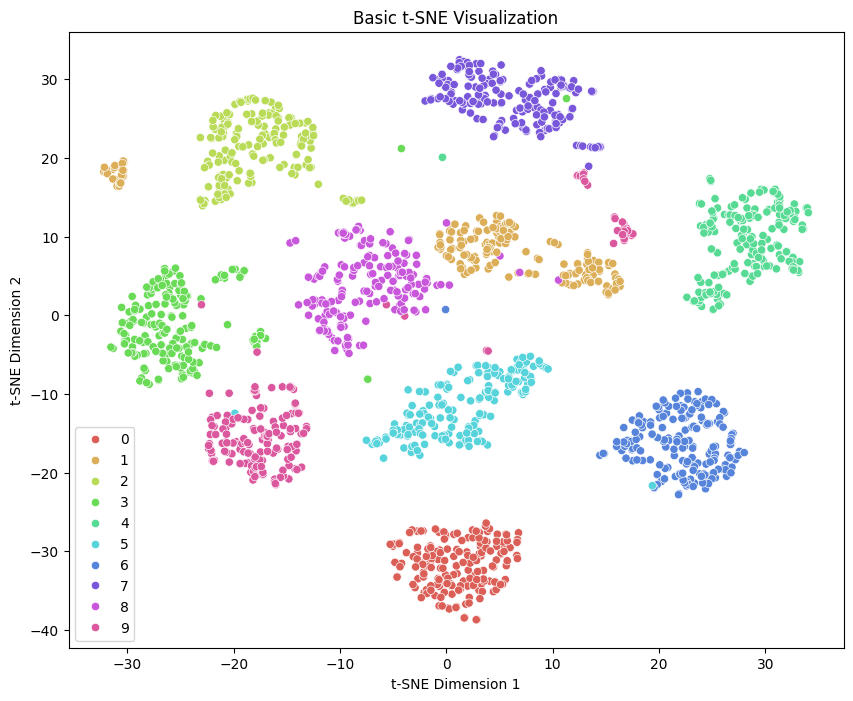

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


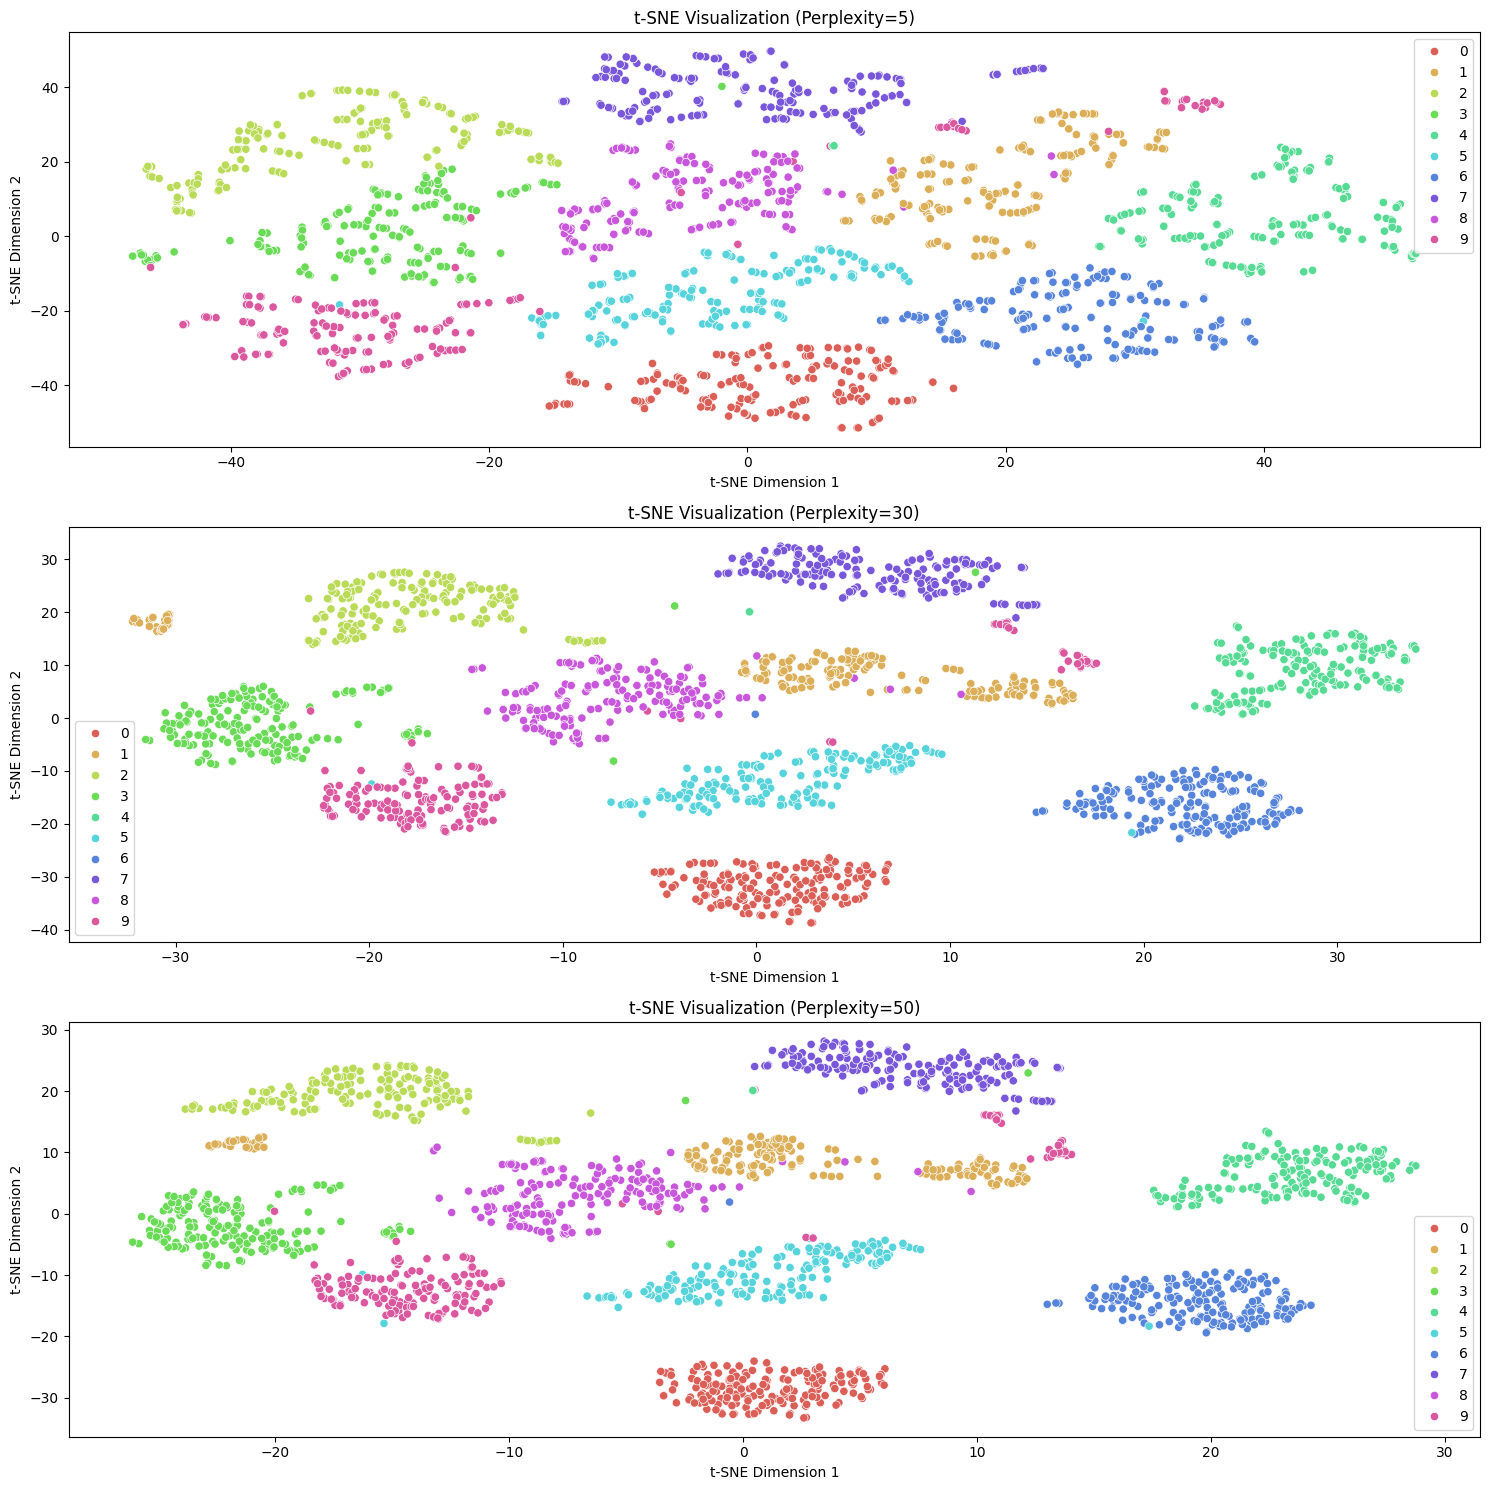

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


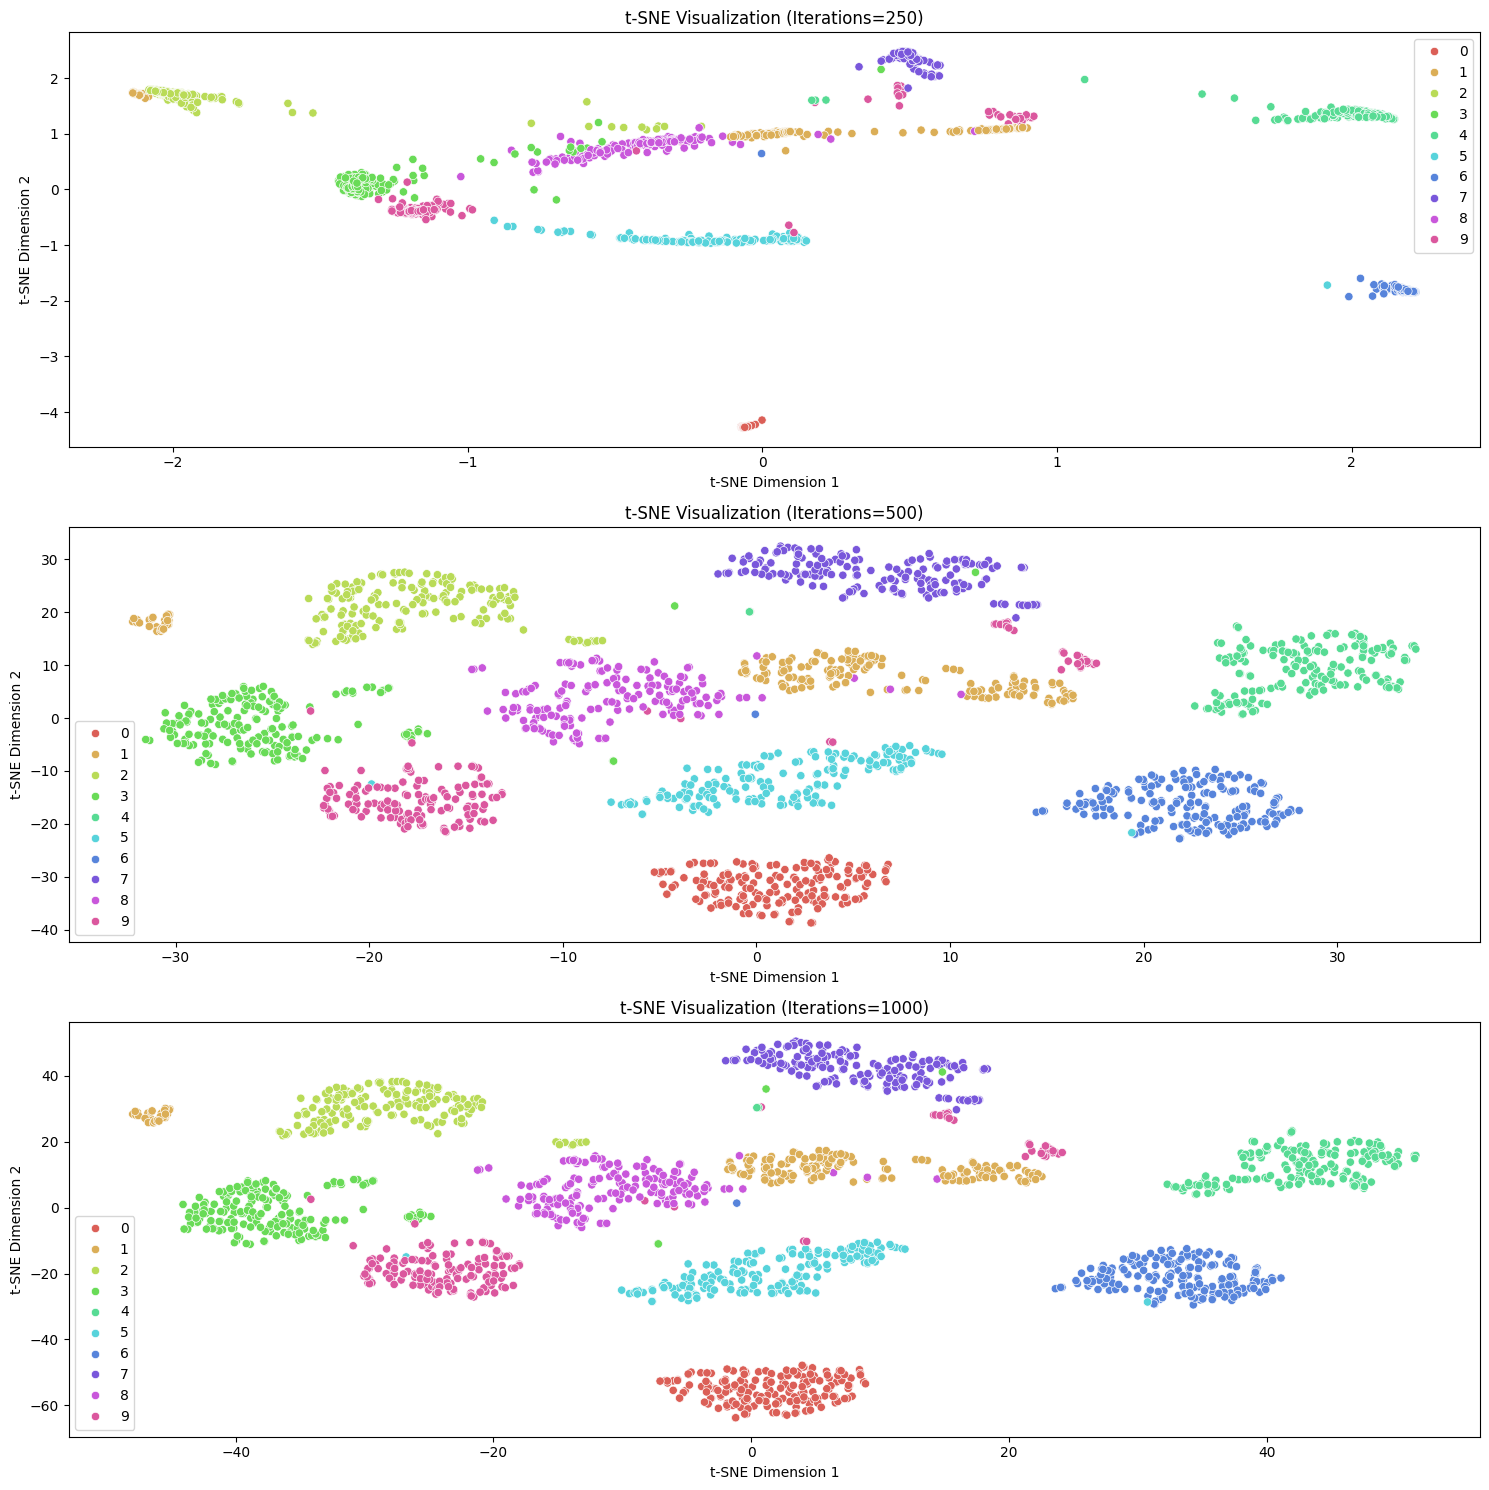

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


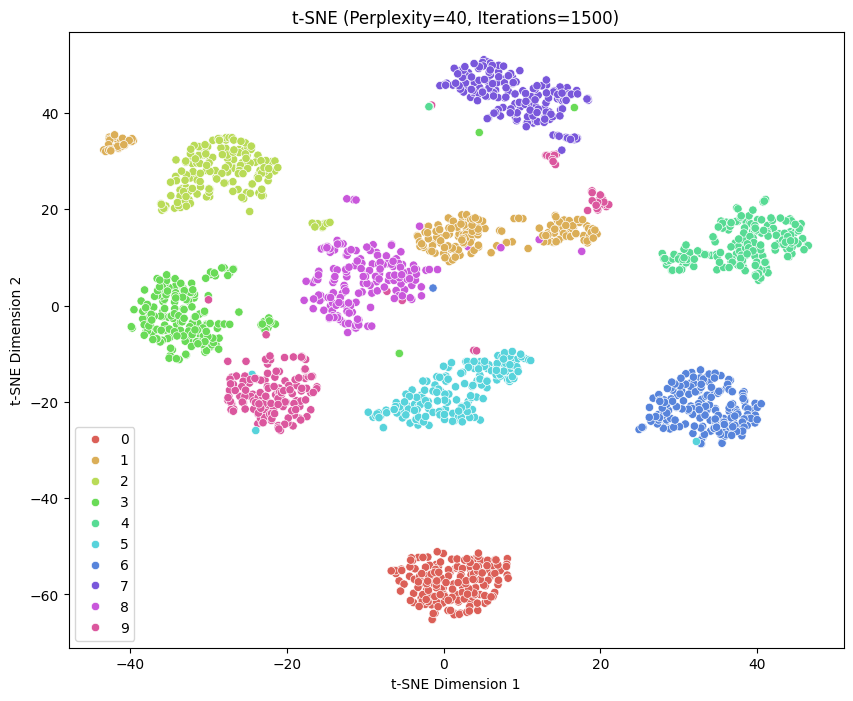

In [16]:
# --- Main Execution ---
if __name__ == "__main__":
    # Basic t-SNE visualization
    X_embedded_basic = perform_tsne(X)
    visualize_tsne(X_embedded_basic, y, 'Basic t-SNE Visualization')

    # Experiment with perplexity
    experiment_with_perplexity(X, y)

    # Experiment with iterations
    experiment_with_iterations(X, y)

    # Example with specific parameters
    perplexity = 40
    iterations = 1500
    X_embedded_custom = perform_tsne(X, perplexity=perplexity, n_iter=iterations)
    visualize_tsne(X_embedded_custom, y, f't-SNE (Perplexity={perplexity}, Iterations={iterations})')

**In Summary:**

The code takes the high-dimensional digits dataset, reduces its dimensionality using t-SNE, and visualizes the resulting 2D embedding. It also demonstrates how to experiment with the perplexity and iterations parameters, which are crucial for obtaining good t-SNE visualizations. The visualizations help to understand how t-SNE groups similar data points (digits in this case) together in the lower-dimensional space.





